# HW 1 CS675 Sec:103
# Professor Li Daming
# Herat Zaveri

# ETF and Stocks Evaluation :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

def createFrame(value):
    currentPath = "C:\\Users\\Herat\\Downloads\\CSV\\"
    frame = pd.read_csv(currentPath+value)
    
    return frame

frame_ge = createFrame('GE.csv')
frame_msft = createFrame('MSFT.csv')

#For ETF study
frame_VEA = createFrame('VEA.csv')

#  Analysis of ETF: Vanguard Developed Markets Index Fund

In [2]:
frame_VEA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-24,41.389999,41.389999,41.060001,41.090000,40.082695,13552600
1,2019-09-25,40.880001,41.060001,40.730000,41.020000,40.014416,15322500
2,2019-09-26,41.189999,41.209999,41.040001,41.110001,40.102207,7247500
3,2019-09-27,41.119999,41.150002,40.840000,40.930000,39.926613,9373000
4,2019-09-30,40.959999,41.119999,40.930000,41.080002,40.072941,7563800


In [3]:
frame_VEA['Volatility'] = (frame_VEA['High'] - frame_VEA['Low'])/frame_VEA['Close']
frame_VEA['Volume_prevday'] = frame_VEA['Volume'].shift()
frame_VEA['Volatility_prevday'] = frame_VEA['Volatility'].shift()
frame_VEA['Volume_delta'] = frame_VEA['Volume'] - frame_VEA['Volume_prevday']
frame_VEA['Volatility_delta'] = frame_VEA['Volatility'] - frame_VEA['Volatility_prevday']
frame_VEA['Volatility_delta'].fillna(value=frame_VEA['Volatility_delta'].mean(), inplace=True)
frame_VEA['Volume_delta'].fillna(value=frame_VEA['Volume_delta'].mean(), inplace=True)
frame_VEA.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_prevday,Volatility_prevday,Volume_delta,Volatility_delta
0,2019-09-24,41.389999,41.389999,41.060001,41.090000,40.082695,13552600,0.008031,NaN,NaN,-3.575997e+04,8.121080e-07
1,2019-09-25,40.880001,41.060001,40.730000,41.020000,40.014416,15322500,0.008045,13552600.0,0.008031,1.769900e+06,1.377809e-05
2,2019-09-26,41.189999,41.209999,41.040001,41.110001,40.102207,7247500,0.004135,15322500.0,0.008045,-8.075000e+06,-3.909682e-03
3,2019-09-27,41.119999,41.150002,40.840000,40.930000,39.926613,9373000,0.007574,7247500.0,0.004135,2.125500e+06,3.438757e-03
4,2019-09-30,40.959999,41.119999,40.930000,41.080002,40.072941,7563800,0.004625,9373000.0,0.007574,-1.809200e+06,-2.948858e-03
5,2019-10-01,40.990002,41.020000,40.630001,40.709999,39.712013,14038800,0.009580,7563800.0,0.004625,6.475000e+06,4.954834e-03
6,2019-10-02,40.230000,40.240002,39.799999,39.900002,38.921867,10410200,0.011028,14038800.0,0.009580,-3.628600e+06,1.447712e-03
7,2019-10-03,39.900002,40.180000,39.740002,40.180000,39.195000,13239800,0.010951,10410200.0,0.011028,2.829600e+06,-7.697158e-05
8,2019-10-04,40.180000,40.509998,40.180000,40.490002,39.497406,6326500,0.008150,13239800.0,0.010951,-6.913300e+06,-2.800561e-03
9,2019-10-07,40.439999,40.610001,40.400002,40.439999,39.448631,8294300,0.005193,6326500.0,0.008150,1.967800e+06,-2.957257e-03


In [4]:
frame_VEA.describe()

,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_prevday,Volatility_prevday,Volume_delta,Volatility_delta
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000,2.530000e+02,253.000000,2.540000e+02,2.540000e+02
mean,40.102520,40.308701,39.864725,40.096870,39.548033,1.483906e+07,0.011799,1.487990e+07,0.011813,-3.575997e+04,8.121080e-07
std,3.683741,3.555354,3.792221,3.674396,3.543460,1.284005e+07,0.010877,1.284895e+07,0.010896,5.554624e+06,5.787923e-03
min,29.110001,29.530001,28.459999,28.780001,28.483370,3.377400e+06,0.002034,3.377400e+06,0.002034,-1.812600e+07,-2.109132e-02
25%,38.735000,38.995000,38.402501,38.792501,38.434734,7.254675e+06,0.004902,7.276200e+06,0.004877,-2.188950e+06,-2.659530e-03
50%,41.005001,41.170001,40.835001,41.030000,40.612160,9.995550e+06,0.008511,1.001900e+07,0.008575,-3.937999e+04,-2.298664e-05
75%,42.967500,43.055001,42.860001,42.967500,41.997738,1.689628e+07,0.014269,1.699760e+07,0.014318,2.041200e+06,2.764952e-03
max,44.639999,44.669998,44.540001,44.660000,44.002819,6.738500e+07,0.068235,6.738500e+07,0.068235,2.584930e+07,2.461812e-02


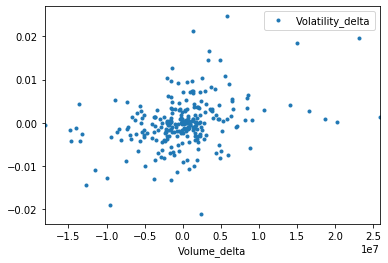

In [5]:
frame_VEA.plot(x='Volume_delta', y='Volatility_delta', style='.')

In [6]:
#For training algorithm 
x_2 = frame_VEA['Volume_delta'].values.reshape(-1,1)
y_2 = frame_VEA['Volatility_delta'].values.reshape(-1,1)

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(x_2,y_2,test_size=0.30,random_state=0)
regressor = LinearRegression()
regressor.fit(X_train_2,Y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

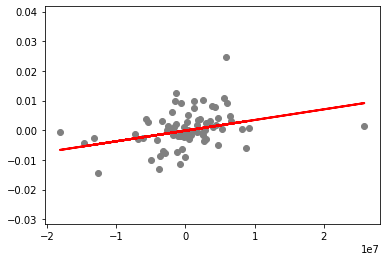

In [7]:
y_pred_VEA = regressor.predict(X_test_2)
plt.scatter(X_test_2, Y_test_2,  color='gray')
plt.plot(X_test_2, y_pred_VEA, color='red', linewidth=2)
plt.show()

In [8]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_2, y_pred_VEA))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_2, y_pred_VEA))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_2, y_pred_VEA)))
print('R-squared Error:', metrics.r2_score(Y_test_2, y_pred_VEA))

Mean Absolute Error: 0.004261376344705673
Mean Squared Error: 3.375646750022111e-05
Root Mean Squared Error: 0.005810031626438974
R-squared Error: 0.09947536345411057


Results of ETF Analysis:

We may have some error within our regression algorithm due to many values not being positive real numbers and the very small timeframe that we used to gather the data. So there may be error in accuracy and the root mean squared is closer to our mean so our algorithm may be correctly outputting results based on how we trained it. Generally, all errors are very small so out algorithm maybe accurate but it could be better trained with more data. 

# GE and MSFT Stock Analysis

In [9]:
frame_ge.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-24,9.31,9.35,8.96,8.97,8.939582,53343000
1,2019-09-25,8.96,9.20,8.94,9.16,9.128936,43859400
2,2019-09-26,9.18,9.21,8.96,9.02,8.989412,37229800
3,2019-09-27,9.04,9.17,8.99,9.04,9.009343,30511000
4,2019-09-30,9.08,9.10,8.94,8.94,8.909682,35091400


In [10]:
frame_msft.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-24,140.360001,140.690002,136.880005,137.380005,135.833603,29773200
1,2019-09-25,137.500000,139.960007,136.029999,139.360001,137.791306,21382000
2,2019-09-26,139.440002,140.179993,138.440002,139.539993,137.969284,17456600
3,2019-09-27,140.149994,140.360001,136.649994,137.729996,136.179642,22477700
4,2019-09-30,138.050003,139.220001,137.779999,139.029999,137.465027,17280900
5,2019-10-01,139.660004,140.250000,137.000000,137.070007,135.527100,21466600
6,2019-10-02,136.250000,136.369995,133.580002,134.649994,133.134323,30521700
7,2019-10-03,134.949997,136.750000,133.220001,136.279999,134.745972,24132900
8,2019-10-04,136.750000,138.250000,136.419998,138.119995,136.565262,22897700
9,2019-10-07,137.139999,138.179993,137.020004,137.119995,135.576523,15303700


In [11]:
frame_ge['Volatility'] = (frame_ge['High'] - frame_ge['Low'])/frame_ge['Close']
frame_ge['Volume_prevday'] = frame_ge['Volume'].shift()
frame_ge['Volatility_prevday'] = frame_ge['Volatility'].shift()
frame_ge['Volume_delta'] = frame_ge['Volume'] - frame_ge['Volume_prevday']
frame_ge['Volatility_delta'] = frame_ge['Volatility'] - frame_ge['Volatility_prevday']
frame_ge['Volatility_delta'].fillna(value=frame_ge['Volatility_delta'].mean(), inplace=True)
frame_ge['Volume_delta'].fillna(value=frame_ge['Volume_delta'].mean(), inplace=True)
frame_ge.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_prevday,Volatility_prevday,Volume_delta,Volatility_delta
0,2019-09-24,9.31,9.35,8.96,8.97,8.939582,53343000,0.043478,NaN,NaN,-1.225762e+05,-0.000100
1,2019-09-25,8.96,9.20,8.94,9.16,9.128936,43859400,0.028384,53343000.0,0.043478,-9.483600e+06,-0.015094
2,2019-09-26,9.18,9.21,8.96,9.02,8.989412,37229800,0.027716,43859400.0,0.028384,-6.629600e+06,-0.000668
3,2019-09-27,9.04,9.17,8.99,9.04,9.009343,30511000,0.019912,37229800.0,0.027716,-6.718800e+06,-0.007805
4,2019-09-30,9.08,9.10,8.94,8.94,8.909682,35091400,0.017897,30511000.0,0.019912,4.580400e+06,-0.002014
5,2019-10-01,8.96,9.04,8.51,8.61,8.580801,68778600,0.061556,35091400.0,0.017897,3.368720e+07,0.043659
6,2019-10-02,8.56,8.62,8.41,8.51,8.481141,47520800,0.024677,68778600.0,0.061556,-2.125780e+07,-0.036879
7,2019-10-03,8.50,8.71,8.25,8.71,8.680462,58626600,0.052813,47520800.0,0.024677,1.110580e+07,0.028136
8,2019-10-04,8.61,8.70,8.54,8.57,8.540937,52272800,0.018670,58626600.0,0.052813,-6.353800e+06,-0.034143
9,2019-10-07,8.55,8.65,8.48,8.56,8.530972,32170400,0.019860,52272800.0,0.018670,-2.010240e+07,0.001190


In [12]:
frame_ge.describe()

,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_prevday,Volatility_prevday,Volume_delta,Volatility_delta
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000,2.530000e+02,253.000000,2.540000e+02,254.000000
mean,8.644016,8.800591,8.469961,8.624882,8.607339,8.444290e+07,0.040954,8.468840e+07,0.041043,-1.225762e+05,-0.000100
std,2.290700,2.293664,2.299644,2.302765,2.290295,4.343150e+07,0.025927,4.334064e+07,0.025939,3.725166e+07,0.022740
min,5.610000,5.660000,5.480000,5.490000,5.481781,2.076900e+07,0.007156,2.076900e+07,0.007156,-1.467936e+08,-0.074529
25%,6.595000,6.770000,6.450000,6.600000,6.592589,5.229092e+07,0.022870,5.234530e+07,0.022907,-1.652858e+07,-0.010765
50%,7.585000,7.825000,7.195000,7.585000,7.573645,7.444990e+07,0.032800,7.474800e+07,0.032812,-2.688000e+05,-0.001935
75%,11.100000,11.197500,10.977500,11.100000,11.062359,1.063673e+08,0.050210,1.066127e+08,0.050350,1.226918e+07,0.009502
max,13.080000,13.260000,12.900000,13.160000,13.127263,2.610403e+08,0.145480,2.610403e+08,0.145480,1.701844e+08,0.086830


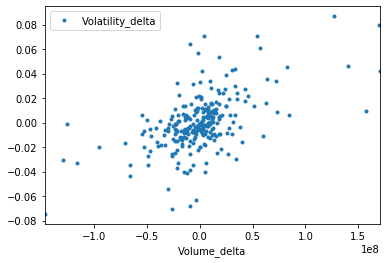

In [13]:
frame_ge.plot(x='Volume_delta', y='Volatility_delta', style='.')

In [14]:
x_1 = frame_ge['Volume_delta'].values.reshape(-1,1)
y_1 = frame_ge['Volatility_delta'].values.reshape(-1,1)

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(x_1,y_1,test_size=0.30,random_state=0)
regressor = LinearRegression()
regressor.fit(X_train_1,Y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

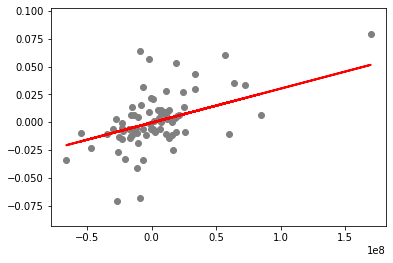

In [15]:
y_pred_ge = regressor.predict(X_test_1)
plt.scatter(X_test_1, Y_test_1,  color='gray')
plt.plot(X_test_1, y_pred_ge, color='red', linewidth=2)
plt.show()

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_1, y_pred_ge))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_1, y_pred_ge))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_1, y_pred_ge)))
print('R-squared Error:', metrics.r2_score(Y_test_1, y_pred_ge))

Mean Absolute Error: 0.014971989102366653
Mean Squared Error: 0.000461972116829359
Root Mean Squared Error: 0.02149353662916736
R-squared Error: 0.2834786752880377


In [17]:
frame_msft['Volatility'] = (frame_msft['High'] - frame_msft['Low'])/frame_msft['Close']
frame_msft['Volume_prevday'] = frame_msft['Volume'].shift()
frame_msft['Volatility_prevday'] = frame_msft['Volatility'].shift()
frame_msft['Volume_delta'] = frame_msft['Volume'] - frame_msft['Volume_prevday']
frame_msft['Volatility_delta'] = frame_msft['Volatility'] - frame_msft['Volatility_prevday']
frame_msft['Volatility_delta'].fillna(value=frame_msft['Volatility_delta'].mean(), inplace=True)
frame_msft['Volume_delta'].fillna(value=frame_msft['Volume_delta'].mean(), inplace=True)
frame_msft.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_prevday,Volatility_prevday,Volume_delta,Volatility_delta
0,2019-09-24,140.360001,140.690002,136.880005,137.380005,135.833603,29773200,0.027733,NaN,NaN,-8.519545e+04,-0.000007
1,2019-09-25,137.500000,139.960007,136.029999,139.360001,137.791306,21382000,0.028200,29773200.0,0.027733,-8.391200e+06,0.000467
2,2019-09-26,139.440002,140.179993,138.440002,139.539993,137.969284,17456600,0.012469,21382000.0,0.028200,-3.925400e+06,-0.015731
3,2019-09-27,140.149994,140.360001,136.649994,137.729996,136.179642,22477700,0.026937,17456600.0,0.012469,5.021100e+06,0.014467
4,2019-09-30,138.050003,139.220001,137.779999,139.029999,137.465027,17280900,0.010357,22477700.0,0.026937,-5.196800e+06,-0.016579
5,2019-10-01,139.660004,140.250000,137.000000,137.070007,135.527100,21466600,0.023711,17280900.0,0.010357,4.185700e+06,0.013353
6,2019-10-02,136.250000,136.369995,133.580002,134.649994,133.134323,30521700,0.020720,21466600.0,0.023711,9.055100e+06,-0.002990
7,2019-10-03,134.949997,136.750000,133.220001,136.279999,134.745972,24132900,0.025903,30521700.0,0.020720,-6.388800e+06,0.005182
8,2019-10-04,136.750000,138.250000,136.419998,138.119995,136.565262,22897700,0.013249,24132900.0,0.025903,-1.235200e+06,-0.012653
9,2019-10-07,137.139999,138.179993,137.020004,137.119995,135.576523,15303700,0.008460,22897700.0,0.013249,-7.594000e+06,-0.004790


In [18]:
frame_msft.describe()

,Open,High,Low,Close,Adj Close,Volume,Volatility,Volume_prevday,Volatility_prevday,Volume_delta,Volatility_delta
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000,2.530000e+02,253.000000,2.540000e+02,254.000000
mean,174.453937,176.617166,172.217992,174.540442,173.643273,3.577288e+07,0.025174,3.588179e+07,0.025170,-8.519545e+04,-0.000007
std,25.691344,25.945259,25.238485,25.653933,26.055551,1.794504e+07,0.018873,1.789630e+07,0.018911,1.084077e+07,0.012568
min,134.949997,136.369995,132.520004,134.649994,133.134323,8.218751e+06,0.003749,8.989200e+06,0.003749,-3.575930e+07,-0.047656
25%,151.404999,153.447502,150.285004,151.712498,150.515178,2.317498e+07,0.012696,2.325140e+07,0.012683,-6.266200e+06,-0.006627
50%,172.715004,174.525002,169.485001,172.330002,171.202866,3.091500e+07,0.020117,3.091740e+07,0.019757,-2.539000e+05,-0.000829
75%,197.860005,200.722497,195.410000,199.864998,199.383023,4.208635e+07,0.030158,4.214670e+07,0.030283,5.397625e+06,0.005246
max,229.270004,232.860001,227.350006,231.649994,231.649994,9.707360e+07,0.133350,9.707360e+07,0.133350,3.696880e+07,0.064441


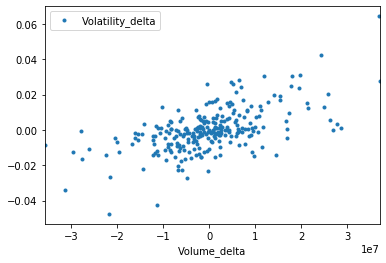

In [19]:
frame_msft.plot(x='Volume_delta', y='Volatility_delta', style='.')

In [20]:
x = frame_msft['Volume_delta'].values.reshape(-1,1)
y = frame_msft['Volatility_delta'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.30,random_state=0)
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = regressor.predict(X_test)
#y_pred

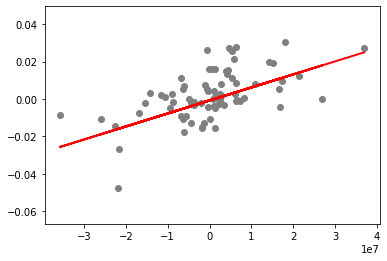

In [22]:
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(Y_test, y_pred))

Mean Absolute Error: 0.008641335440015437
Mean Squared Error: 0.0001240057096635974
Root Mean Squared Error: 0.011135785094172634
R-squared Error: 0.2762186952459711


Results of Stocks Analysis:

We may have some error within our regression algorithm due to many values not being positive real numbers and the very small timeframe that we used to gather the data. So there may be error in accuracy and the root mean squared is little higher than 10% so our algorithm may not be correctly outputting results based on how we trained it.


# Summary:

Using linear regression algorithm the ETF is seen to have more stability compared to the most active stocks of GE and Microsoft. When we compare the intraday volatilty to the intraday volume of stock what is surprising is that higher volumes sold lead to more volatility for the stock price within the market. However, the ETF is relatively stable investment as higher volumes sold doesn't lead to huge changes in stock price. This is useful in future to make decisions about where to invest money.